# Assignment_5

## Task-1

In [1]:
import numpy as np
import pandas as pd

In [2]:
baby_names = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv")

In [3]:
baby_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 7 columns):
Unnamed: 0    1016395 non-null int64
Id            1016395 non-null int64
Name          1016395 non-null object
Year          1016395 non-null int64
Gender        1016395 non-null object
State         1016395 non-null object
Count         1016395 non-null int64
dtypes: int64(4), object(3)
memory usage: 54.3+ MB


In [4]:
baby_names.describe()

,Unnamed: 0,Id,Year,Count
count,1.016395e+06,1.016395e+06,1.016395e+06,1.016395e+06
mean,2.830990e+06,2.830991e+06,2.009053e+03,3.485012e+01
std,1.652476e+06,1.652476e+06,3.138293e+00,9.739735e+01
min,1.134900e+04,1.135000e+04,2.004000e+03,5.000000e+00
25%,1.317326e+06,1.317328e+06,2.006000e+03,7.000000e+00
50%,2.811920e+06,2.811921e+06,2.009000e+03,1.100000e+01
75%,4.242554e+06,4.242556e+06,2.012000e+03,2.600000e+01
max,5.647425e+06,5.647426e+06,2.014000e+03,4.167000e+03


In [5]:
baby_names.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [6]:
baby_names.shape

(1016395, 7)

### 1. Delete unnamed columns


In [7]:
baby_names.drop(baby_names.columns[baby_names.columns.str.contains('Unnamed')],axis=1,inplace=True)

### 2. Show the distribution of male and female

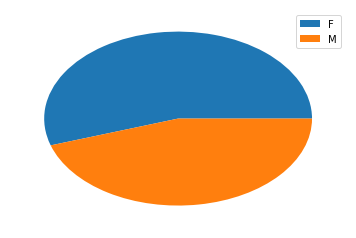

In [97]:
plt.pie(baby_names['Gender'].value_counts())
plt.legend(baby_names['Gender'].value_counts().index[:])

### 3. Show the top 5 most preferred names

In [9]:
baby_names['Name'].value_counts(sort=True).head(5)

Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Name: Name, dtype: int64

In [75]:
#just for my practice
from wordcloud import WordCloud

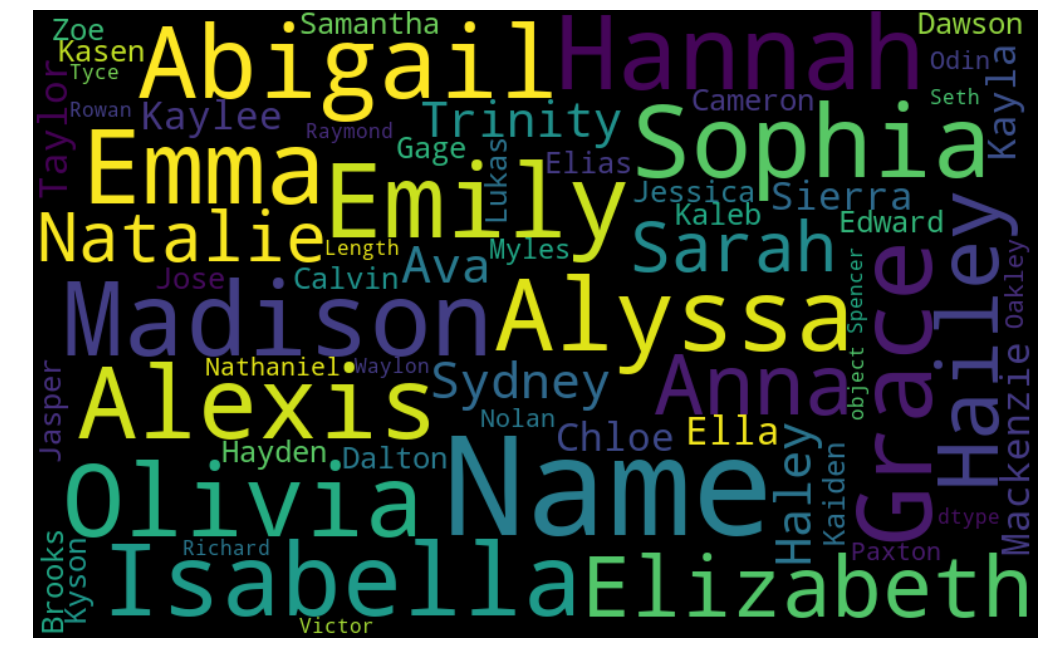

In [79]:
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(str(baby_names['Name']))
plt.figure(figsize=(18,118))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### 4. What is the median name occurence in the dataset

In [81]:
baby_names['Name'].value_counts(sort=True).index[int(baby_names['Name'].value_counts(sort=True).median())]

'Payton'

### 5. Distribution of male and female born count by states

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

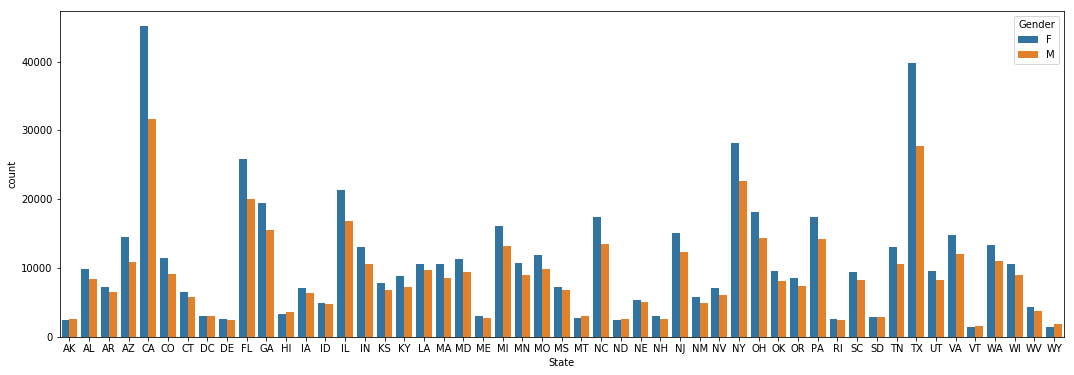

In [70]:
#df = baby_names.groupby(['State','Gender'])['Count'].sum()

plt.figure(figsize=(18,6))
sns.countplot(x=baby_names['State'],hue=baby_names['Gender'])

## Task-2

In [204]:
months=np.arange(12)
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
days = np.linspace(0, 12, num=365)

In [209]:
months

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [205]:
from scipy.optimize import curve_fit
def func(times, avg, ampl, time_offset):
    return (avg+ ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = curve_fit(func, months,
                                      max_temp, [20, 10, 0])
res_min, cov_min = curve_fit(func, months,
                                      min_temp, [-40, 20, 0])

In [206]:
res_max

array([ 39.88861734, -10.59083168,   1.33370154])

In [207]:
res_min

array([25.55626462, -7.74472963,  0.93101294])

Text(0,0.5,'Temperature ($^\\circ$C)')

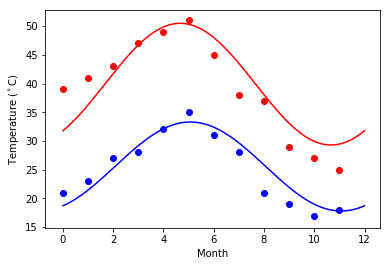

In [217]:
plt.scatter(months,max_temp,c='r',marker='o')
plt.scatter(months,min_temp,c='b',marker='o')
plt.plot(days,func(days,*res_max),'r-')
plt.plot(days,func(days,*res_min),'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')